In [1]:
#分組後再找出車流量大於 20萬 的路線或者做其他分析過濾，只顯示周 六與周日，X、Y 軸上的標籤可做修改，再以圖表顯示
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
font=FontProperties(fname='/Library/Fonts/Arial Unicode.ttf',size=8)

In [4]:
df = pd.read_csv('交通流量.csv')
df

,路線方向,路段,交流道,進出口,週六,週日,週2-4
0,國1南向,非主線資料,基隆端,進口,34246,31547,29403
1,國1南向,非主線資料,基隆,出口,9484,8123,9403
2,國1南向,非主線資料,基隆,"進口1-尚仁路,基隆",2108,1997,2579
3,國1南向,非主線資料,基隆,"進口2-麥金路,金山",6051,5398,5895
4,國1南向,非主線資料,八堵,進口,10785,11990,9027
...,...,...,...,...,...,...,...
751,國10西向,非主線資料,燕巢系統,出口,4612,4647,3906
752,國10西向,非主線資料,燕巢系統,進口1-國3南,6515,8890,6517
753,國10西向,非主線資料,燕巢系統,進口2-國3北,10822,13415,11181
754,國10西向,非主線資料,嶺口,進口,5196,5680,4242


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 7 columns):
路線方向    756 non-null object
路段      756 non-null object
交流道     756 non-null object
進出口     756 non-null object
週六      756 non-null object
週日      756 non-null object
週2-4    756 non-null object
dtypes: object(7)
memory usage: 41.5+ KB


In [ ]:
df['週六'].map(lambda x:print(x) if ',' in x else print('no'))

In [10]:
#先前整理資料

def f(x):
    if ',' in x:
        l = x.split(',')
        return int(''.join(l))
    else:
        return int(x)

df['週六'] = df['週六'].map(f)
df['週日'] = df['週日'].map(f)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 7 columns):
路線方向    756 non-null object
路段      756 non-null object
交流道     756 non-null object
進出口     756 non-null object
週六      756 non-null int64
週日      756 non-null int64
週2-4    756 non-null object
dtypes: int64(2), object(5)
memory usage: 41.5+ KB


In [16]:
df[-30:]

,路線方向,路段,交流道,進出口,週六,週日,週2-4
726,國10東向,非主線資料,燕巢系統,進口1-國3南,5482,4046,3230
727,國10東向,非主線資料,燕巢系統,進口2-國3北,1404,1846,1197
728,國10東向,非主線資料,嶺口,出口,9654,8739,8156
729,國10東向,非主線資料,旗山端,出口,14864,15360,10270
730,國6西向,非主線資料,霧峰系統,出口,23486,26633,17200
731,國6西向,非主線資料,舊正,出口,2784,4950,2269
732,國6西向,非主線資料,東草屯,出口,1035,1746,979
733,國6西向,非主線資料,東草屯,進口,3597,3461,3479
734,國6西向,非主線資料,國姓,出口,483,651,405
735,國6西向,非主線資料,國姓,進口,3193,4232,2358


In [17]:
grouped = df.groupby('路線方向')['週六','週日']
grouped

In [19]:
sum=grouped.sum()
sum

,週六,週日
路線方向,,
國10東向,190315,179386
國10西向,203908,212663
國1北向,2201802,2087014
國1南向,2274715,2066203
國1高架北向,294048,294671
國1高架南向,287731,265966
國2東向,339452,322930
國2西向,309509,298983
國3北向,1309358,1349691


In [25]:
series_sum = sum.stack()
series_sum

路線方向      
國10東向   週六     190315
        週日     179386
國10西向   週六     203908
        週日     212663
國1北向    週六    2201802
        週日    2087014
國1南向    週六    2274715
        週日    2066203
國1高架北向  週六     294048
        週日     294671
國1高架南向  週六     287731
        週日     265966
國2東向    週六     339452
        週日     322930
國2西向    週六     309509
        週日     298983
國3北向    週六    1309358
        週日    1349691
國3南向    週六    1364935
        週日    1257226
國3甲東向   週六      87002
        週日      74524
國3甲西向   週六     104507
        週日     100709
國4東向    週六     102624
        週日      98616
國4西向    週六     103744
        週日     104851
國5北向    週六     109263
        週日     110033
國5南向    週六     123497
        週日      96328
國6東向    週六      60824
        週日      52078
國6西向    週六      54810
        週日      68804
國8東向    週六      90036
        週日      89496
國8西向    週六      89276
        週日      94721
dtype: int64

In [27]:
series_sum = series_sum[series_sum >= 200000]
series_sum

路線方向      
國10西向   週六     203908
        週日     212663
國1北向    週六    2201802
        週日    2087014
國1南向    週六    2274715
        週日    2066203
國1高架北向  週六     294048
        週日     294671
國1高架南向  週六     287731
        週日     265966
國2東向    週六     339452
        週日     322930
國2西向    週六     309509
        週日     298983
國3北向    週六    1309358
        週日    1349691
國3南向    週六    1364935
        週日    1257226
dtype: int64

In [35]:
result=series_sum.unstack()
result

,週六,週日
路線方向,,
國10西向,203908,212663
國1北向,2201802,2087014
國1南向,2274715,2066203
國1高架北向,294048,294671
國1高架南向,287731,265966
國2東向,339452,322930
國2西向,309509,298983
國3北向,1309358,1349691
國3南向,1364935,1257226


<IPython.core.display.Javascript object>


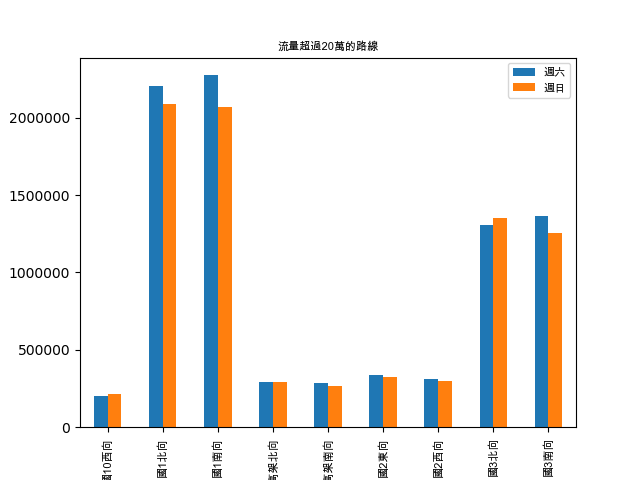

[Text(0, 0, '國10西向'),
 Text(0, 0, '國1北向'),
 Text(0, 0, '國1南向'),
 Text(0, 0, '國1高架北向'),
 Text(0, 0, '國1高架南向'),
 Text(0, 0, '國2東向'),
 Text(0, 0, '國2西向'),
 Text(0, 0, '國3北向'),
 Text(0, 0, '國3南向')]

In [34]:
figure, ax1 = plt.subplots()
result.plot(ax=ax1, kind='bar')
ax1.legend(prop=font)
ax1.set_title('流量超過20萬的路線',fontproperties=font)
ax1.set_xticklabels(result.index, fontproperties=font)